In [112]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from collections import Counter
from itertools import chain
import scipy
import pydicom
import random
from PIL import Image

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [113]:
## Below is some helper code to read all of your full image filepaths into a dataframe for easier manipulation
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
80707,00019825_006.png,No Finding,6,19825,33,M,AP,3056,2544,0.139,0.139,NaN
79535,00019535_005.png,Atelectasis|Infiltration,5,19535,28,F,AP,2500,2048,0.168,0.168,NaN
103686,00027676_008.png,Effusion|Pneumothorax,8,27676,57,M,PA,2992,2991,0.143,0.143,NaN


# Demographics


In [114]:
## EDA
# Todo 

In [115]:
# Show all columns data types
all_xray_df.dtypes

Image Index                     object
Finding Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                      int64
Patient Gender                  object
View Position                   object
OriginalImage[Width              int64
Height]                          int64
OriginalImagePixelSpacing[x    float64
y]                             float64
Unnamed: 11                    float64
dtype: object

In [116]:
# Missing values
def check_null_values(df):
    null_df = pd.DataFrame({'columns': df.columns, 
                            'percent_null': df.isnull().sum() * 100 / len(df), 
                           'percent_zero': df.isin([0]).sum() * 100 / len(df)
                           } )
    return null_df 

In [117]:
# percent_zero can be useful to check the follow-ups
check_null_values(all_xray_df)

,columns,percent_null,percent_zero
Image Index,Image Index,0.0,0.000000
Finding Labels,Finding Labels,0.0,0.000000
Follow-up #,Follow-up #,0.0,27.475027
Patient ID,Patient ID,0.0,0.000000
Patient Age,Patient Age,0.0,0.000000
Patient Gender,Patient Gender,0.0,0.000000
View Position,View Position,0.0,0.000000
OriginalImage[Width,OriginalImage[Width,0.0,0.000000
Height],Height],0.0,0.000000
OriginalImagePixelSpacing[x,OriginalImagePixelSpacing[x,0.0,0.000000


In [118]:
all_xray_df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

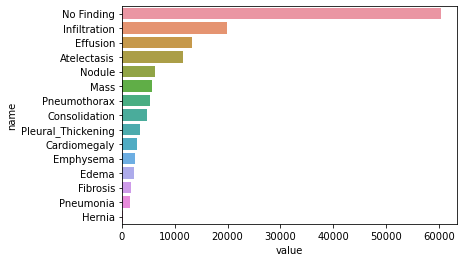

In [119]:
# Lets see the the number of pneumonia cases as compared to other
alist=[]
for x in all_xray_df['Finding Labels']:
    alist.extend(x.split("|"))
    
df=pd.DataFrame(Counter(alist).most_common(), columns=['name','value'])
ax = sns.barplot(x="value", y="name", data=df)

In [120]:
# Below is th exact number and percentage
total = df.value.sum()
df['ratio'] = (df.value*100)/total
df


,name,value,ratio
0,No Finding,60361,42.646799
1,Infiltration,19894,14.055689
2,Effusion,13317,9.408847
3,Atelectasis,11559,8.166769
4,Nodule,6331,4.473035
5,Mass,5782,4.085151
6,Pneumothorax,5302,3.746017
7,Consolidation,4667,3.297371
8,Pleural_Thickening,3385,2.391601
9,Cardiomegaly,2776,1.961325


In [121]:
# visualize categorical distributions
def visualize_distributions(df, c):
    df[c].value_counts().plot(kind='bar')
    plt.show()
    plt.close()

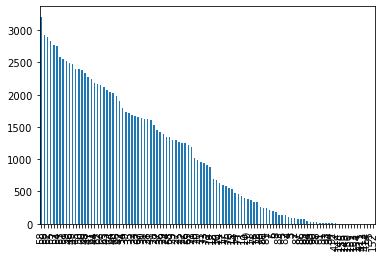

In [122]:
# Lets plot a simple distribution
visualize_distributions(all_xray_df, 'Patient Age')

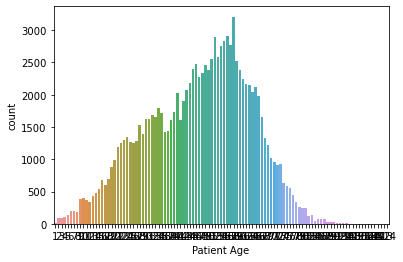

In [123]:
# As previous visualization doesn't provide much of details
sns.countplot(all_xray_df['Patient Age'])

In [124]:
# Above insight doesn't provide much of understandable output

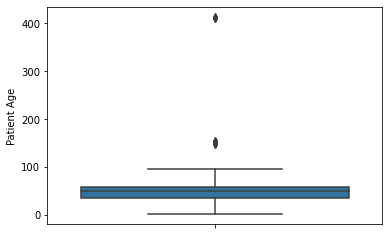

In [125]:
# Lets check if there is any outliers in the data based on patient age
sns.boxplot(y=all_xray_df['Patient Age'])

In [126]:
# As presented in number 
all_xray_df[all_xray_df['Patient Age'] > 110]['Patient Age'].count()

16

In [127]:
# As we have seen some outliers in out dataset, its better to drop them now only before doing any further analysis
all_xray_df = all_xray_df.drop(all_xray_df[all_xray_df['Patient Age'] > 100 ].index)
len(all_xray_df)

112104

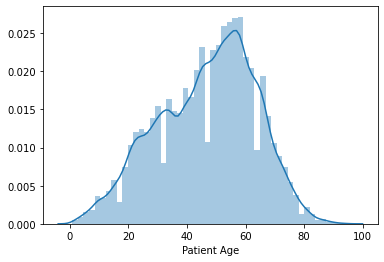

In [71]:
# Now lets see the age distribution. 
sns.distplot(all_xray_df['Patient Age'])

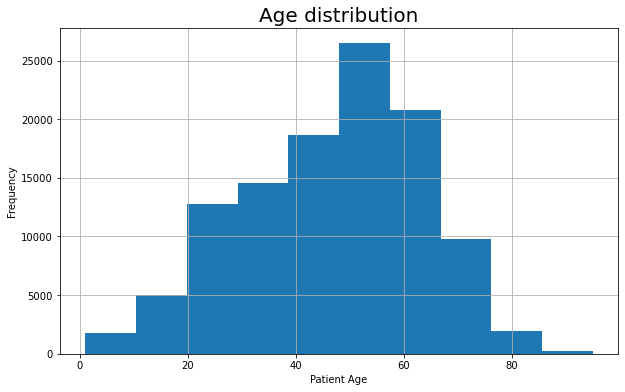

In [72]:
# To better understand the age distribution ...lets plot histogram of the same
plt.figure(figsize=(10,6))
all_xray_df["Patient Age"].hist(bins=10, align='mid')
plt.title("Age distribution", fontsize=20)
plt.xlabel("Patient Age")
plt.ylabel("Frequency")
plt.savefig('age_distribution.png')

In [73]:
age_bins = [5, 18, 30, 40,  50, 65, 90]
a_bin = [str(x) for x in age_bins ]
age_labels = ["".join(x) for x in zip( [x + " - " for x in a_bin[:-1]], a_bin[1:])]
all_xray_df['age_bins'] = pd.cut(all_xray_df['Patient Age'], bins=age_bins, labels=age_labels)

In [74]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,age_bins
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,50 - 65
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,50 - 65
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,50 - 65
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,65 - 90
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,65 - 90


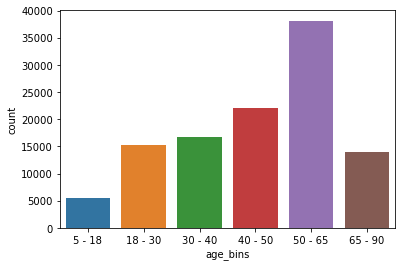

In [75]:
# To get much better understanding of the data ...we have grouped them into bins
ax = sns.countplot(x="age_bins", data=all_xray_df)

figure = ax.get_figure()    
figure.savefig('age_bins.png', dpi=150)


In [76]:
# As clear from above age-bins distribution that we have large number of samples in the age group 50-56

## Before doing further analysis ..first lets enrich data 

In [77]:
# Split up my "Finding Labels" column so that I have one column in my dataframe per disease
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(
        lambda x: x.split('|')).tolist())))
for c_label in all_labels:        
    if len(c_label) > 1:  # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(
            lambda finding, l_label=c_label: 1.0 if l_label in finding else 0)

In [78]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


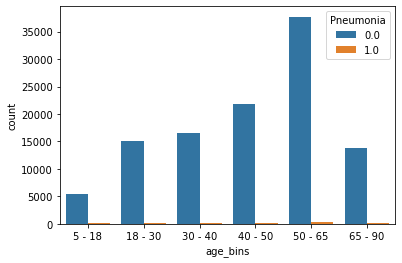

In [79]:
# Plotting samples wrt gender
# Observation: there are very less pneumonia patient in each age group
all_xray_df['count']=1
df = all_xray_df.groupby(['age_bins',"Pneumonia"]).count()[['count']].reset_index()
ax = sns.barplot(x='age_bins',y='count',hue="Pneumonia", data=df)

In [80]:
df['ratio'] = (df['count'] * 100)/df.groupby('age_bins')['count'].transform('sum')

In [81]:
# Now, it becomes more clear that in each group there is very less number of pneumonia patient
df

,age_bins,Pneumonia,count,ratio
0,5 - 18,0.0,5413,98.132705
1,5 - 18,1.0,103,1.867295
2,18 - 30,0.0,15092,98.563218
3,18 - 30,1.0,220,1.436782
4,30 - 40,0.0,16455,98.521135
5,30 - 40,1.0,247,1.478865
6,40 - 50,0.0,21851,98.868829
7,40 - 50,1.0,250,1.131171
8,50 - 65,0.0,37683,98.887344
9,50 - 65,1.0,424,1.112656


Text(0.5, 1.0, 'Age distribution for pneumonia cases')

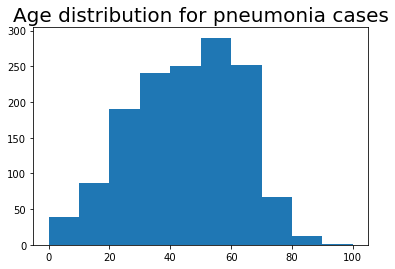

In [82]:
plt.figure()
plt.hist([all_xray_df[all_xray_df["Pneumonia"]==1]['Patient Age'].values], bins = 10, range=[0, 100])
plt.title('Age distribution for pneumonia cases', fontsize=20)
# Though the 50-60 age groups have maximum pneumonia patient but number of sample in that class is also large

### from the above visualization, it is clear that we do have lots of sample in each age bin but have very few cases of pneumonia

# now lets do the analysis with respect to gender

Number of male pneumonia patient: 63328
Number of male pneumonia patient: 48776


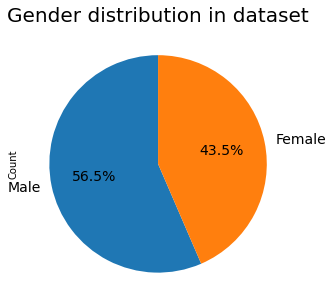

In [83]:
gender = {}
male_cnt = len(all_xray_df[all_xray_df["Patient Gender"] == "M"])
gender['Count'] = [male_cnt, len(all_xray_df) - male_cnt]
gender['Gender'] = ['Male', 'Female']
gender_df = pd.DataFrame(gender, columns = ['Gender', 'Count'])
gender_df.plot.pie(y = 'Count', autopct='%1.1f%%', startangle=90, shadow=False, 
                   labels=gender_df['Gender'], legend = False, fontsize=14, figsize=(5, 5))
plt.title("Gender distribution in dataset", fontsize=20)
print("Number of male pneumonia patient:", male_cnt)
print("Number of male pneumonia patient:", len(all_xray_df)-male_cnt)
plt.savefig("gender-ditr.png")

anteroposterior: 44805
posteroanterior: 67299


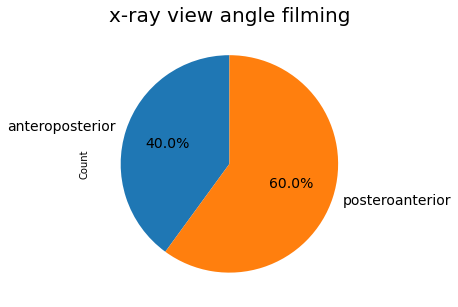

In [84]:
#Position
ap = len(all_xray_df[all_xray_df["View Position"] == "AP"])
pa = len(all_xray_df) - ap
position = {"Position": ["anteroposterior", "posteroanterior"], "Count": [ap, pa]}
position_df = pd.DataFrame(position, columns = ['Position', 'Count'])
position_df.plot.pie(y = 'Count', autopct='%1.1f%%', startangle=90, shadow=False, labels=position_df['Position'], legend = False, fontsize=14, figsize=(5, 5))
plt.title("x-ray view angle filming", fontsize=20)
print("anteroposterior:", ap)
print("posteroanterior:", pa)
plt.savefig('position.png')

In [85]:
!ls | grep "png"

age_bins.png
age_distribution.png
auc-plot.png
disease_dist.png
gender-ditr.png
loass-acc.png
position.png
pr-plot.png


,Patient Gender,Pneumonia,count
0,F,0.0,48183
1,F,1.0,593
2,M,0.0,62491
3,M,1.0,837


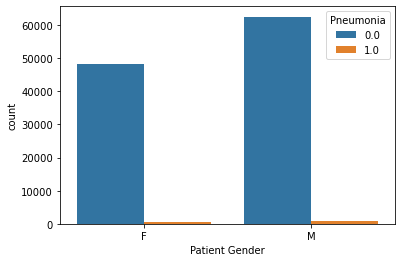

In [86]:
# Plotting samples wrt gender
all_xray_df['count']=1
df = all_xray_df.groupby(['Patient Gender',"Pneumonia"]).count()[['count']].reset_index()
ax = sns.barplot(x='Patient Gender',y='count',hue="Pneumonia", data=df)
df

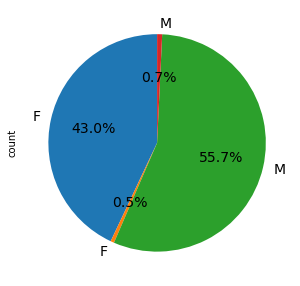

In [87]:
# To get a clear view of distribution of pneumonia among genders
df.plot.pie(y = 'count', autopct='%1.1f%%', startangle=90, shadow=False, 
                   labels=df['Patient Gender'], legend = False, fontsize=14, figsize=(5, 5))


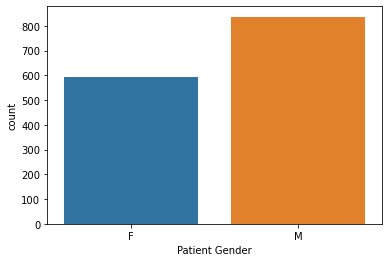

In [88]:
# Just to plot the counts for pneumonia patient
ax = sns.barplot(x='Patient Gender',y='count', data=df[df["Pneumonia"]==1])

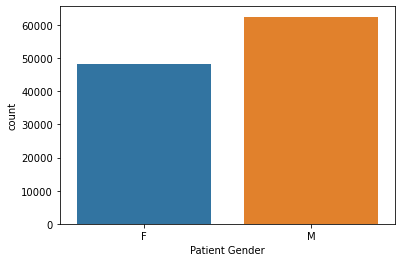

In [89]:
# Just to plot the counts for non pneumonia patient
ax = sns.barplot(x='Patient Gender',y='count', data=df[df["Pneumonia"]==0])

# Get the cardinaliyt of various features

In [90]:
def count_unique_values(df, cat_col_list):
    cat_df = df[cat_col_list]
    val_df = pd.DataFrame({'columns': cat_df.columns, 
                       'cardinality': cat_df.nunique() } )
    return val_df

In [91]:
column_list = ['Finding Labels', 'Follow-up #',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]','age_bins']

In [92]:
count_unique_values(all_xray_df, column_list)

,columns,cardinality
Finding Labels,Finding Labels,836
Follow-up #,Follow-up #,184
Patient Age,Patient Age,95
Patient Gender,Patient Gender,2
View Position,View Position,2
OriginalImage[Width,OriginalImage[Width,904
Height],Height],1137
OriginalImagePixelSpacing[x,OriginalImagePixelSpacing[x,23
y],y],23
age_bins,age_bins,6


# Analysis around various disease and combination of them

In [93]:
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')


In [94]:
# As we have seen some outliers in out dataset, its better to drop them now only before doing any further analysis
all_xray_df = all_xray_df.drop(all_xray_df[all_xray_df['Patient Age'] > 100 ].index)

In [95]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [96]:
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(
        lambda x: x.split('|')).tolist())))
for c_label in all_labels:        
    if len(c_label) > 1:  # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(
            lambda finding, l_label=c_label: 1.0 if l_label in finding else 0)

In [97]:
all_labels

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'], dtype='<U18')

In [98]:
# count of labels
print("Number of labels: {}".format(len(all_labels)))
all_xray_df[all_labels].sum()


Number of labels: 15


Atelectasis           11558.0
Cardiomegaly           2776.0
Consolidation          4667.0
Edema                  2302.0
Effusion              13316.0
Emphysema              2516.0
Fibrosis               1686.0
Hernia                  227.0
Infiltration          19891.0
Mass                   5779.0
No Finding            60353.0
Nodule                 6331.0
Pleural_Thickening     3384.0
Pneumonia              1430.0
Pneumothorax           5301.0
dtype: float64

In [99]:
pneu_counts = all_xray_df.groupby('Pneumonia')["Pneumonia"].value_counts()

In [100]:
total_counts = len(all_xray_df)

In [101]:
print("Number of pneumonia = {}/{}".format(pneu_counts[1][1], total_counts))
print("Number of non-pneumonia = {}/{}".format(pneu_counts[0][0], total_counts))

Number of pneumonia = 1430/112104
Number of non-pneumonia = 110674/112104


Pneumonia case: 1430.0


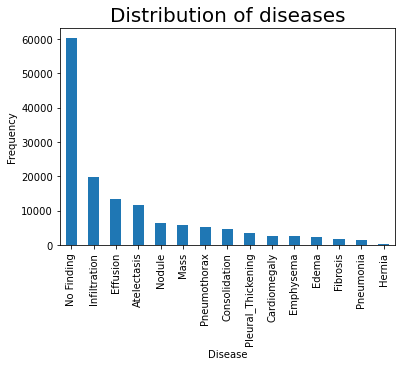

In [102]:
# Plot the distribution of various disesase
plt.figure()
all_xray_df[all_labels].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Distribution of diseases", fontsize=20)
plt.xlabel("Disease")
plt.ylabel("Frequency")
plt.savefig('disease_dist.png')
print("Pneumonia case:", all_xray_df["Pneumonia"].sum())

## Lets try to find link between pathologies 

In [103]:
# Lets get the number of various disease first
disease_counts = all_xray_df[all_labels].sum()
disease_counts

Atelectasis           11558.0
Cardiomegaly           2776.0
Consolidation          4667.0
Edema                  2302.0
Effusion              13316.0
Emphysema              2516.0
Fibrosis               1686.0
Hernia                  227.0
Infiltration          19891.0
Mass                   5779.0
No Finding            60353.0
Nodule                 6331.0
Pleural_Thickening     3384.0
Pneumonia              1430.0
Pneumothorax           5301.0
dtype: float64

In [104]:
# So pneumonia is less occcurcing disease in this dataset.
disease_counts.sort_values()

Hernia                  227.0
Pneumonia              1430.0
Fibrosis               1686.0
Edema                  2302.0
Emphysema              2516.0
Cardiomegaly           2776.0
Pleural_Thickening     3384.0
Consolidation          4667.0
Pneumothorax           5301.0
Mass                   5779.0
Nodule                 6331.0
Atelectasis           11558.0
Effusion              13316.0
Infiltration          19891.0
No Finding            60353.0
dtype: float64

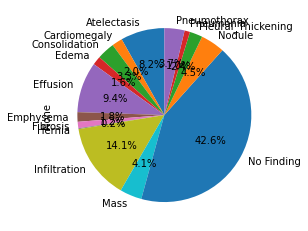

In [105]:
disease_counts.plot.pie(y=df.index,
           shadow=False,
           startangle=90,
           autopct='%1.1f%%')

In [106]:
# #First display Top 10 multiple deseases
data=all_xray_df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False).head(23)
data=data[['|' in index for index in data.index.values]]
data

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Finding Labels,,,,,,,,,,,,,,,,,,,,,
Effusion|Infiltration,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,...,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603
Atelectasis|Infiltration,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,...,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350
Atelectasis|Effusion,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,...,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165
Infiltration|Nodule,829,829,829,829,829,829,829,829,829,829,...,829,829,829,829,829,829,829,829,829,829
Atelectasis|Effusion|Infiltration,737,737,737,737,737,737,737,737,737,737,...,737,737,737,737,737,737,737,737,737,737
Cardiomegaly|Effusion,484,484,484,484,484,484,484,484,484,484,...,484,484,484,484,484,484,484,484,484,484
Consolidation|Infiltration,441,441,441,441,441,441,441,441,441,441,...,441,441,441,441,441,441,441,441,441,441
Infiltration|Mass,418,418,418,418,418,418,418,418,418,418,...,418,418,418,418,418,418,418,418,418,418
Effusion|Pneumothorax,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403


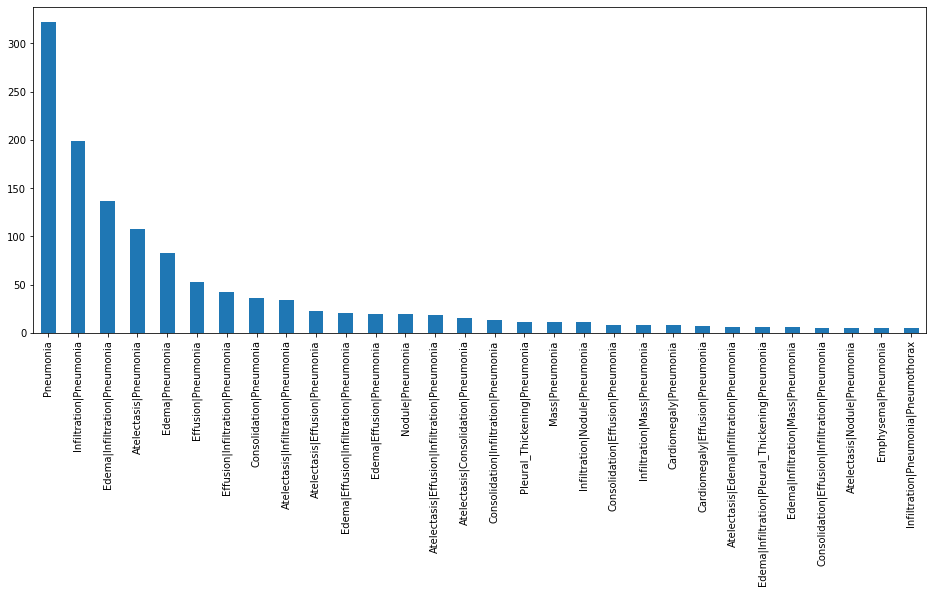

In [111]:
##Since there are many combinations of potential findings, I'm going to look at the 30 most common co-occurrences:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')
plt.savefig('pn_coocurrence.png',bbox_inches = 'tight')

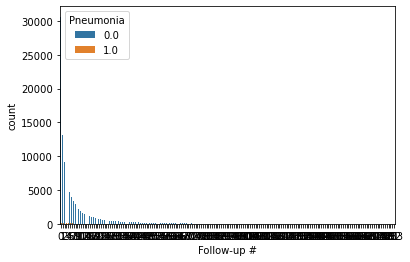

In [109]:
# Lets check the follow up count for all disease patient
# df_follow_up = all_xray_df.groupby(['Follow-up #'])
all_xray_df['count']=1
df = all_xray_df.groupby(['Follow-up #',"Pneumonia"]).count()[['count']].reset_index()
ax = sns.barplot(x='Follow-up #',y='count',hue="Pneumonia", data=df)


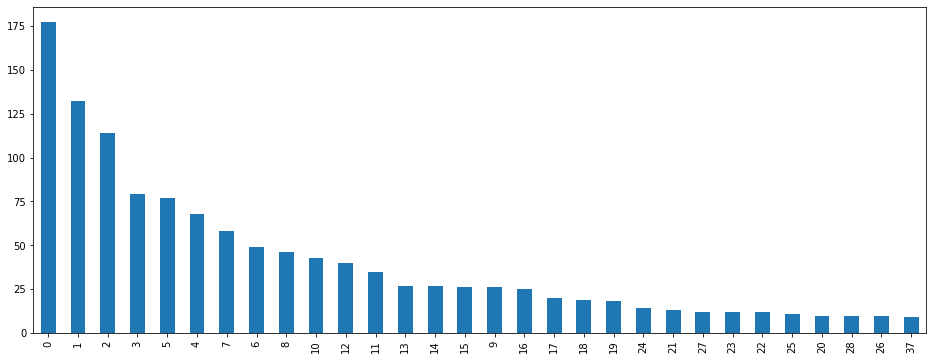

In [110]:
# Lets check the follow up count of Pneumonia patient
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1]['Follow-up #'].value_counts()[0:30].plot(kind='bar')

## The Pearson correlation coefficient measures the linear relationship between two datasets. Let's look at if and how age & gender relate to Pneumonia in individuals:

In [185]:
# No correlation of age
scipy.stats.pearsonr(all_xray_df["Pneumonia"].values,all_xray_df['Patient Age'].values)

(-0.01507973637273618, 4.4362142784372045e-07)

In [186]:
# No correlation of gender
scipy.stats.pearsonr(all_xray_df["Pneumonia"].values,all_xray_df['Patient Gender'].apply(lambda x : 1 if x=='M' else 0))

(0.004679748971872028, 0.11714703657652067)

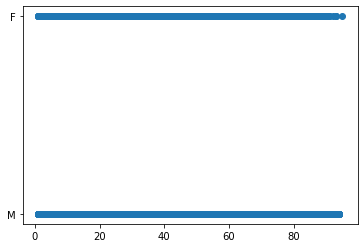

In [187]:
plt.scatter(all_xray_df['Patient Age'],all_xray_df['Patient Gender'])

In [55]:
!ls

 age_bins.png		        loass-acc.png
 age_distribution.png	        my_model.json
 auc-plot.png		        position.png
'Build and train model.ipynb'   pr-plot.png
 disease_dist.png	        sample_labels.csv
 downloader.ipynb	        test1.dcm
 EDA.ipynb		        test2.dcm
 FDA_Submission..pdf	        test3.dcm
 FDA_Submission_Template.md     test4.dcm
 gender-ditr.png	        test5.dcm
 images			        test6.dcm
 Inference.ipynb	        xray_class_my_model.best.hdf5


# Pixel leve assesment.

In [56]:
## Load sample data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')


In [57]:
# Split up my "Finding Labels" column so that I have one column in my dataframe per disease
all_labels = np.unique(list(chain(*sample_df['Finding Labels'].map(
        lambda x: x.split('|')).tolist())))
for c_label in all_labels:        
    if len(c_label) > 1:  # leave out empty labels
        sample_df[c_label] = sample_df['Finding Labels'].map(
            lambda finding, l_label=c_label: 1.0 if l_label in finding else 0)

In [58]:
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
889,00004737_008.png,Consolidation|Effusion|Pneumothorax,8,4737,041Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4042,00019912_000.png,Infiltration,0,19912,074Y,M,PA,2838,2877,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4359,00021514_000.png,No Finding,0,21514,064Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [59]:
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', sample_df.shape[0])
sample_df['path'] = sample_df['Image Index'].map(all_image_paths.get)

Scans found: 112120 , Total Headers 5606


In [60]:
sample_df.path[:2]

0    /data/images_001/images/00000013_005.png
1    /data/images_001/images/00000013_026.png
Name: path, dtype: object

In [61]:
# Filter out pnemonia and non-pneumonia cases
pn_sample = sample_df[sample_df.Pneumonia == 1]
npn_sample = sample_df[sample_df.Pneumonia == 0]

In [62]:
pn_case = pn_sample.iloc[random.randint(0,len(pn_sample))]
npn_case = npn_sample.iloc[random.randint(0,len(npn_sample))]

Text(0.5, 1.0, 'Nodule')

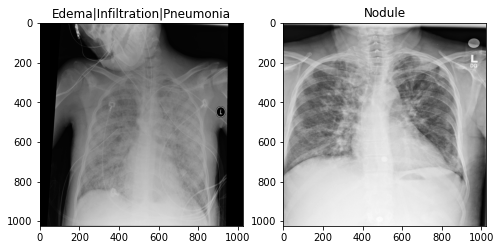

In [63]:
# Create gray image of pneumonia patient.
fig, m_axs = plt.subplots(1,2, figsize = (8, 4))

pn_img = Image.open(pn_case.path)
m_axs[0].imshow(pn_img,cmap='gray')
m_axs[0].set_title(pn_case['Finding Labels'])

npn_img = Image.open(npn_case.path)
m_axs[1].imshow(npn_img,cmap='gray')
m_axs[1].set_title(npn_case['Finding Labels'])

Pneumonia case mean intensity: 96.94597053527832
Pneumonia case  std intensity: 67.70671985846457


Text(0.5, 1.0, 'Normalized')

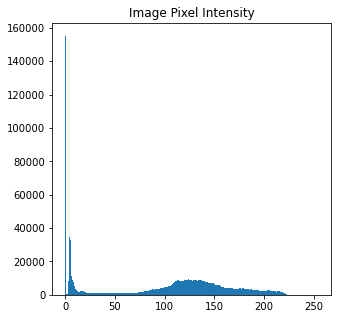

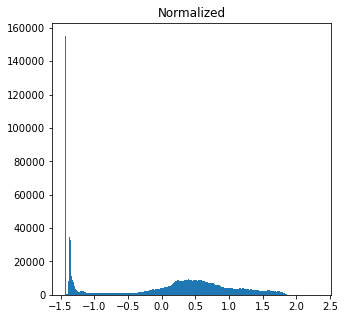

In [64]:
# For Pneumonia case
pixel_array = np.array(pn_img.getdata())
plt.figure(figsize=(5,5))
plt.hist(pixel_array.ravel(), bins = 256)
plt.title('Image Pixel Intensity')

# Pixel average
mean_intensity = np.mean(pixel_array)
print("Pneumonia case mean intensity:", mean_intensity)
std_intensity = np.std(pixel_array)
print("Pneumonia case  std intensity:",std_intensity)
new_img = pixel_array.copy()
new_img = (new_img - mean_intensity)/std_intensity
plt.figure(figsize=(5,5))
plt.hist(new_img.ravel(), bins = 256)
plt.title('Normalized')

Non Pneumonia case mean intensity: 153.2470645904541
Non Pneumonia case  std intensity: 51.71095004051286


Text(0.5, 1.0, 'Normalized')

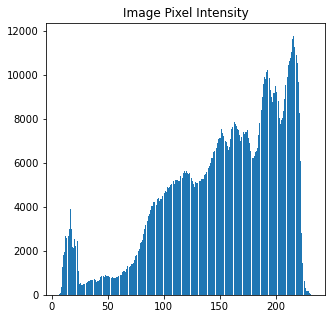

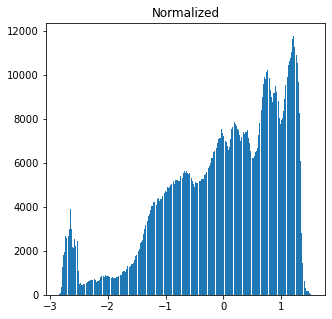

In [65]:
# Non pneumonia cases
pixel_array = np.array(npn_img.getdata())
plt.figure(figsize=(5,5))
plt.hist(pixel_array.ravel(), bins = 256)
plt.title('Image Pixel Intensity')

# Pixel average
mean_intensity = np.mean(pixel_array)
print("Non Pneumonia case mean intensity:", mean_intensity)
std_intensity = np.std(pixel_array)
print("Non Pneumonia case  std intensity:",std_intensity)
new_img = pixel_array.copy()
new_img = (new_img - mean_intensity)/std_intensity
plt.figure(figsize=(5,5))
plt.hist(new_img.ravel(), bins = 256)
plt.title('Normalized')

### So from the above mean image intensity and std, it is clear that there is significant difference between pneumonia and non-pneumonia iamges

In [66]:
# Lets try to find out for all images. 

In [67]:
def get_img_mean(row):
    pn_img = Image.open(row.path)
    pixel_array = np.array(pn_img.getdata())
    mean_intensity = np.mean(pixel_array)
    return pd.Series(dict(img_intensity_mean= mean_intensity, img_intensity_std= np.std(pixel_array)))


In [69]:
new_sample_df = sample_df.join(sample_df.apply(get_img_mean, axis="columns"))
# sample_df['mean_intensity'] = sample_df.apply(lambda x : get_img_mean(x.path),axis=1)

In [71]:
new_sample_df.to_csv('sample_label_mean.csv')

In [72]:
new_sample_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,path,img_intensity_mean,img_intensity_std
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,/data/images_001/images/00000013_005.png,93.601353,44.932927
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000013_026.png,113.472080,51.136916
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000017_001.png,156.328647,55.941572
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000030_001.png,123.979362,66.035449
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000032_001.png,157.159357,54.276406


In [75]:
new_sample_df.groupby(['Pneumonia'])['img_intensity_mean', 'img_intensity_std'].mean()

,img_intensity_mean,img_intensity_std
Pneumonia,,
0.0,127.197383,58.752448
1.0,125.478945,59.235042


In [76]:
df = new_sample_df[new_sample_df['Pneumonia']==1].groupby(['Finding Labels'])['img_intensity_std', 'img_intensity_mean'].mean()

In [77]:
df


,img_intensity_std,img_intensity_mean
Finding Labels,,
Atelectasis|Consolidation|Edema|Infiltration|Pneumonia,30.337384,164.930660
Atelectasis|Consolidation|Effusion|Infiltration|Pneumonia,54.645573,119.554935
Atelectasis|Consolidation|Infiltration|Pneumonia,62.509484,124.422637
Atelectasis|Consolidation|Mass|Pneumonia,68.347524,166.438951
Atelectasis|Edema|Effusion|Infiltration|Pneumonia,58.501374,109.780562
Atelectasis|Edema|Effusion|Pneumonia,51.246946,121.765101
Atelectasis|Pneumonia,59.828470,161.112290
Cardiomegaly|Consolidation|Pneumonia,61.076117,125.096513
Cardiomegaly|Edema|Infiltration|Pneumonia,86.725988,88.972160


In [80]:
new_sample_df[new_sample_df['Pneumonia']==0].groupby(['Finding Labels'])['img_intensity_std', 'img_intensity_mean'].mean()

,img_intensity_std,img_intensity_mean
Finding Labels,,
Atelectasis,56.638289,130.240991
Atelectasis|Cardiomegaly,58.848136,139.297293
Atelectasis|Cardiomegaly|Consolidation,70.736717,111.163079
Atelectasis|Cardiomegaly|Consolidation|Effusion|Infiltration|Mass|Pleural_Thickening,55.103909,113.533335
Atelectasis|Cardiomegaly|Effusion,57.745290,103.350654
...,...,...
Nodule|Pleural_Thickening,60.578020,125.839310
Nodule|Pneumothorax,62.048026,143.877871
Pleural_Thickening,62.932459,125.458882


In [81]:
diseases = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

for x in diseases:
    print(new_sample_df.groupby([x])['img_intensity_mean', 'img_intensity_std'].mean()    )

             img_intensity_mean  img_intensity_std
Atelectasis                                       
0.0                  127.078690          58.833154
1.0                  128.178789          58.001429
              img_intensity_mean  img_intensity_std
Cardiomegaly                                       
0.0                   127.242657          58.744933
1.0                   124.687009          59.255924
               img_intensity_mean  img_intensity_std
Consolidation                                       
0.0                    127.408441          58.783144
1.0                    121.701655          58.154099
       img_intensity_mean  img_intensity_std
Edema                                       
0.0             127.29142          58.827633
1.0             121.92099          55.509252
          img_intensity_mean  img_intensity_std
Effusion                                       
0.0               127.570432          58.638682
1.0               124.157616          59.675475
    

In [90]:
# Lets see the image intensity of only pneumonia and non pneumonia
pn_mean = new_sample_df[new_sample_df['Finding Labels'] == 'Pneumonia'].groupby(['Finding Labels'])['img_intensity_std', 'img_intensity_mean'].mean()
npn_mean_std = new_sample_df[~new_sample_df['Finding Labels'].str.contains('Pneumonia')]['img_intensity_std'].mean()
npn_int_mean = new_sample_df[~new_sample_df['Finding Labels'].str.contains('Pneumonia')][ 'img_intensity_mean'].mean()

In [92]:
print(pn_mean)
print("Non Pneumonia", npn_mean_std, npn_int_mean)

                img_intensity_std  img_intensity_mean
Finding Labels                                       
Pneumonia                63.18522           117.46058
Non Pneumonia 58.752447857866436 127.19738337814722


# From the above analysis of image pixed density
1. Mean and std across various disease is not varying a lot
2. mean and std of pneumonia and non-pneumonia quite have a difference in image average intensity. But in all the dataset, we have lots of occurrence of other disease with Pneumonia.
  
According to which, I think simple threshold mechanish would not be approriateto classify the disease.

## DICOM Image assesment

No Finding


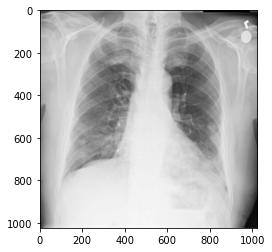

In [93]:
# Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function
dcm = pydicom.dcmread('test1.dcm')

# Visualize the image using plt.imshow
plt.imshow(dcm.pixel_array,cmap='gray')
print(dcm.StudyDescription)

In [101]:
dcm.dir()

['BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'HighBit',
 'Modality',
 'PatientAge',
 'PatientID',
 'PatientPosition',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesInstanceUID',
 'StudyDescription',
 'StudyInstanceUID']

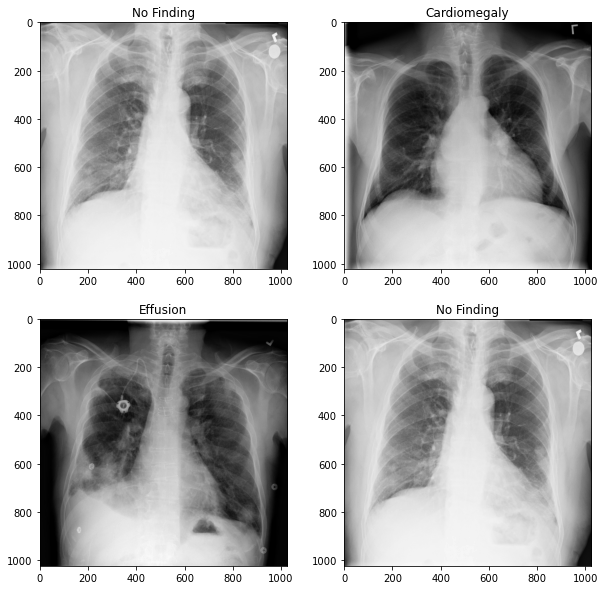

In [103]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0,0].imshow(pydicom.dcmread('test1.dcm').pixel_array,cmap='gray')
ax[0,0].set_title( pydicom.dcmread('test1.dcm').StudyDescription)

ax[0,1].imshow(pydicom.dcmread('test2.dcm').pixel_array,cmap='gray')
ax[0,1].set_title( pydicom.dcmread('test2.dcm').StudyDescription)

ax[1,0].imshow(pydicom.dcmread('test3.dcm').pixel_array,cmap='gray')
ax[1,0].set_title( pydicom.dcmread('test3.dcm').StudyDescription)

ax[1,1].imshow(pydicom.dcmread('test4.dcm').pixel_array,cmap='gray')
ax[1,1].set_title(pydicom.dcmread('test4.dcm').StudyDescription)


plt.show()

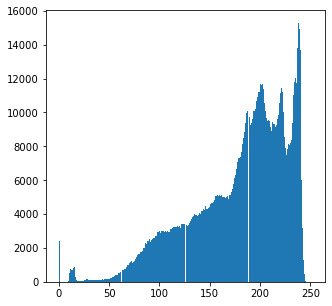

In [104]:
# Plot a histogram of the image pixel intensity values
plt.figure(figsize=(5,5))
plt.hist(dcm.pixel_array.ravel(), bins = 256)
plt.show()

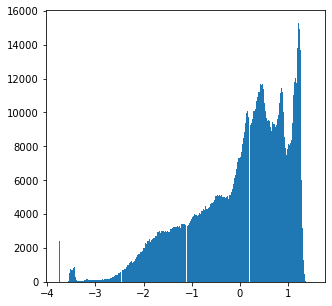

In [105]:
# Find the mean and std dev intensity values of the image, and normalize it
mean_intensity = np.mean(dcm.pixel_array)
std_intensity = np.std(dcm.pixel_array)
new_img = dcm.pixel_array.copy()
new_img = (new_img - mean_intensity)/std_intensity

# Re-plot a histogram of the normalized intensity values
plt.figure(figsize=(5,5))
plt.hist(new_img.ravel(), bins = 256)
plt.show()

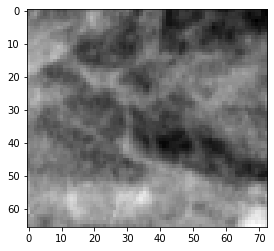

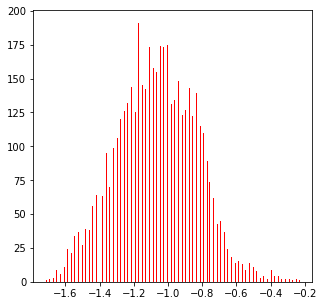

In [106]:
# Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow
plt.imshow(dcm.pixel_array[535:(535+66),240:(240+73)],cmap='gray')

# Plot a histogram of the normalized intensity values of the mass
plt.figure(figsize=(5,5))
plt.hist(new_img[535:(535+66),240:(240+73)].ravel(), bins = 256,color='red')
plt.show()  